#Final Project: Physician Density and Global Development Indicators
##Vivek Golla HDS 5210-02 Fall 2024
**Introduction**

Global health and economic indicators provide valuable insights into the relationships between healthcare access, professional medical services, and economic development across countries. Understanding these relationships is crucial for shaping public health policies and resource allocation strategies, especially in an increasingly interconnected world.

This project aims to merge and analyze three datasets from leading international organizations to explore the intersections of healthcare coverage, medical workforce density, and economic indicators. Specifically, the datasets include:

1. OECD Healthcare Coverage Data: This dataset provides information on the proportion of populations covered under healthcare systems across multiple countries.
2. WHO Physician Density Data: This dataset offers a measure of the number of physicians available per 10,000 people in various countries.
3. World Bank Global Data: This dataset includes economic and healthcare indicators such as GDP per capita and the proportion of births attended by skilled health professionals.

By combining these datasets, the analysis seeks to uncover meaningful trends and relationships that can inform policy discussions. For instance, the study may reveal how economic prosperity correlates with healthcare coverage or whether the availability of skilled healthcare providers aligns with positive health outcomes such as higher birth attendance rates.

The visualizations generated will make these complex relationships more accessible, enabling stakeholders, including researchers, policymakers, and healthcare administrators, to draw actionable conclusions. This project underscores the importance of integrating diverse datasets to gain a holistic understanding of global health challenges and opportunities.

In [1]:
#importing all libraries that I will need for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#internet file - WHO Data Density of physicians (per 10 000 population) [CSV]
#reading from internet using read_csv function
density = pd.read_csv('https://srhdpeuwpubsa.blob.core.windows.net/whdh/DATADOT/INDICATOR/217795A_ALL_LATEST.csv')
density.head()

#data exploration
print('rows, cols', density.shape)
print(density.head())
print(density.describe())

#transforming data ~
#subsetting to only certain years to align with other datasets
print(density["DIM_TIME"].dtype)#checking datatype of year column
density = density[density["DIM_TIME"].isin([2015,2016,2017])]

#removing unnecessary columns and renaming the columns
print(density.columns)
density_clean = density[["DIM_TIME","GEO_NAME_SHORT","RATE_PER_10000_N"]].copy()
density_clean.rename(columns={'DIM_TIME':'Year', 'GEO_NAME_SHORT':'Country', 'RATE_PER_10000_N':'Physician Density'}, inplace=True)
density_clean.head()

rows, cols (3168, 12)
            IND_ID  IND_CODE IND_UUID IND_PER_CODE  DIM_TIME DIM_TIME_TYPE  \
0  217795AHWF_0001  HWF_0001  217795A     HWF_0001      2006          YEAR   
1  217795AHWF_0001  HWF_0001  217795A     HWF_0001      2012          YEAR   
2  217795AHWF_0001  HWF_0001  217795A     HWF_0001      2020          YEAR   
3  217795AHWF_0001  HWF_0001  217795A     HWF_0001      2016          YEAR   
4  217795AHWF_0001  HWF_0001  217795A     HWF_0001      2018          YEAR   

   DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE DIM_PUBLISH_STATE_CODE  \
0               826           COUNTRY              PUBLISHED   
1               558           COUNTRY              PUBLISHED   
2               608           COUNTRY              PUBLISHED   
3               620           COUNTRY              PUBLISHED   
4               620           COUNTRY              PUBLISHED   

             IND_NAME                                     GEO_NAME_SHORT  \
0  Density of doctors  United Kingdom of Great B

,Year,Country,Physician Density
3,2016,Portugal,49.362
10,2016,Comoros,2.895
13,2015,France,32.391
18,2015,Latvia,31.747
20,2017,Saudi Arabia,24.093


In [3]:
#local file - World Bank Group World Development Indicators [Tab-Delimited Text File]
wdi = pd.read_csv('/content/7f00b99d-25a1-442f-88e1-966fddb29125_Data.txt', sep='\t')
#data exploration
print('rows, cols', wdi.shape)
print(wdi.head())
print(wdi.describe())
#data transformation - renaming the year columns to mention just the year and subsetting data
wdi.rename(columns={'2015 [YR2015]':'2015', '2016 [YR2016]':'2016', '2017 [YR2017]':'2017'}, inplace=True)
wdi = wdi[["Country Name","Series Name", "2015", "2016", "2017"]]

#data pivoting

#unpivoting the year columns - wide to long
wdi_clean = wdi.melt(id_vars=['Country Name', 'Series Name'], value_vars=['2015', '2016', '2017'], var_name='Year', value_name='Value')
print(wdi_clean.head())

#pivoting the Series columns to get two separate columns for the indicators - long to wide
#first have to replace '..' to NaN values
wdi_clean.replace('..', np.NAN, inplace=True)
#converting Value column to float
wdi_clean['Value'] = wdi_clean['Value'].astype(float)
#finally, pivoting the series column
wdi_clean = wdi_clean.pivot_table(index=['Country Name', 'Year'], columns='Series Name', values='Value').reset_index()
wdi_clean.rename(columns={'Country Name':'Country'}, inplace=True)
wdi_clean.head()

rows, cols (537, 7)
                                         Series Name     Series Code  \
0  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
1  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
2  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
3  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
4  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   

     Country Name Country Code 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  
0     Afghanistan          AFG          50.5            ..          53.4  
1         Albania          ALB            ..            ..            ..  
2         Algeria          DZA            ..            ..            ..  
3  American Samoa          ASM            ..            ..            ..  
4         Andorra          AND           100           100           100  
                                              Series Name     Series Code  \
count               

Series Name,Country,Year,Births attended by skilled health staff (% of total),GDP per capita (current US$)
0,Afghanistan,2015,50.5,566.881130
1,Afghanistan,2016,NaN,523.053012
2,Afghanistan,2017,53.4,526.140801
3,Africa Eastern and Southern,2015,NaN,1498.805084
4,Africa Eastern and Southern,2016,NaN,1346.301281


In [4]:
#local file - OECD Healthcare Coverage Data - Selected Dates [CSV]
oecd = pd.read_csv('/content/OECD.ELS.HD,DSD_HEALTH_PROT@DF_HEALTH_PROT,1.0+.A..PT_POP.COVGCMED+TPRIBASI.csv')
#data exploration
print('rows, cols', oecd.shape)
print(oecd.head())
print(oecd.describe())

#data pivoting- pivoting the Measure column, long to wide
oecd_clean = oecd.pivot_table(index=['TIME_PERIOD', 'Reference area'], columns='Insurance type', values='OBS_VALUE').reset_index()
#data transformation - renaming columns
oecd_clean.rename(columns={'TIME_PERIOD':'Year', 'Reference area':'Country'}, inplace=True)
oecd_clean.head()

rows, cols (232, 24)
  STRUCTURE                                     STRUCTURE_ID  \
0  DATAFLOW  OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0)   
1  DATAFLOW  OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0)   
2  DATAFLOW  OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0)   
3  DATAFLOW  OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0)   
4  DATAFLOW  OECD.ELS.HD:DSD_HEALTH_PROT@DF_HEALTH_PROT(1.0)   

        STRUCTURE_NAME ACTION REF_AREA Reference area FREQ  \
0  Healthcare coverage      I      NLD    Netherlands    A   
1  Healthcare coverage      I      NLD    Netherlands    A   
2  Healthcare coverage      I      NLD    Netherlands    A   
3  Healthcare coverage      I      EST        Estonia    A   
4  Healthcare coverage      I      EST        Estonia    A   

  Frequency of observation MEASURE                    Measure  ...  \
0                   Annual     HIC  Health insurance coverage  ...   
1                   Annual     HIC  Health insurance coverage  ...   
2          

Insurance type,Year,Country,Government/compulsory health insurance,Public and primary voluntary health insurance
0,2015,Australia,100.0,100.0
1,2015,Austria,99.9,99.9
2,2015,Belgium,99.0,99.0
3,2015,Bulgaria,88.6,88.6
4,2015,Canada,100.0,100.0


In [5]:
# merging all the datasets together
# making sure all columns are same type
print('density dataset datatypes:\n', density_clean.dtypes)
print('wdi dataset datatypes:\n', wdi_clean.dtypes)
print('oecd dataset datatypes:\n', oecd_clean.dtypes)
#converting Year in wdi clean dataset to int
wdi_clean['Year'] = wdi_clean['Year'].astype(int)
#first merging the density and wdi cleaned datasets
density_wdi_merge = density_clean.merge(wdi_clean, on=['Country', 'Year'], how='inner')
print(density_wdi_merge.head())
#now merging the newly created dataset with the oecd dataset
density_wdi_oecd_merge = density_wdi_merge.merge(oecd_clean, on=['Country', 'Year'], how='inner')
density_wdi_oecd_merge.head()

density dataset datatypes:
 Year                   int64
Country               object
Physician Density    float64
dtype: object
wdi dataset datatypes:
 Series Name
Country                                                  object
Year                                                     object
Births attended by skilled health staff (% of total)    float64
GDP per capita (current US$)                            float64
dtype: object
oecd dataset datatypes:
 Insurance type
Year                                               int64
Country                                           object
Government/compulsory health insurance           float64
Public and primary voluntary health insurance    float64
dtype: object
   Year       Country  Physician Density  \
0  2016      Portugal             49.362   
1  2016       Comoros              2.895   
2  2015        France             32.391   
3  2015        Latvia             31.747   
4  2017  Saudi Arabia             24.093   

   Births attended

,Year,Country,Physician Density,Births attended by skilled health staff (% of total),GDP per capita (current US$),Government/compulsory health insurance,Public and primary voluntary health insurance
0,2016,Portugal,49.362,99.9,19991.972488,100.0,100.0
1,2015,France,32.391,97.7,36652.922305,99.9,99.9
2,2017,Chile,24.546,99.8,15034.058435,75.5,94.0
3,2017,Poland,23.430,99.8,13815.501165,92.6,92.6
4,2016,Belgium,30.781,NaN,42012.622719,99.0,99.0


In [8]:
#describing the final dataset
density_wdi_oecd_merge.describe()
density_wdi_oecd_merge.info()
density_wdi_oecd_merge.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year                                                  87 non-null     int64  
 1   Country                                               87 non-null     object 
 2   Physician Density                                     87 non-null     float64
 3   Births attended by skilled health staff (% of total)  70 non-null     float64
 4   GDP per capita (current US$)                          87 non-null     float64
 5   Government/compulsory health insurance                87 non-null     float64
 6   Public and primary voluntary health insurance         87 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.9+ KB


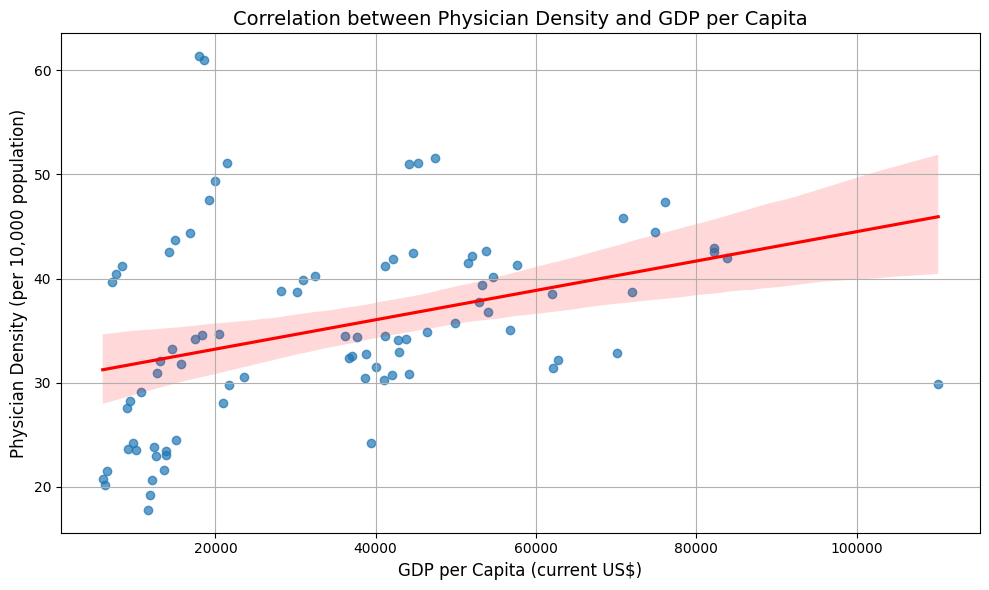

In [10]:
#Answering questions about the data through visualizations

#Correlation between physician density and gdp per capita
subset = density_wdi_oecd_merge[['Physician Density', 'GDP per capita (current US$)']]

# Drop rows with missing values
subset = subset.dropna()

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='GDP per capita (current US$)',
    y='Physician Density',
    data=subset,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)

# Add labels and title
plt.xlabel('GDP per Capita (current US$)', fontsize=12)
plt.ylabel('Physician Density (per 10,000 population)', fontsize=12)
plt.title('Correlation between Physician Density and GDP per Capita', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
